# **Exploratory Analysis**

Modules:

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pickle

In [2]:
df_train = pd.read_csv('./Dataset/SCRM_timeSeries_2018_train.csv')
df_test = pd.read_csv('./Dataset/SCRM_timeSeries_2018_test.csv')
df = pd.concat([df_train, df_test], ignore_index=True)
df.head()

,Timestamp,RI_Supplier1,RI_Distributor1,RI_Manufacturer1,RI_Retailer1,Total_Cost,SCMstability_category
0,02/09/2018 12:44:39 PM,1.6396,1.0422,3.1884,3.3609,133.06,4
1,02/09/2018 12:46:39 PM,1.6399,1.0444,3.1877,3.3642,135.02,4
2,02/09/2018 12:48:39 PM,1.6398,1.0422,3.1880,3.3676,135.36,4
3,02/09/2018 12:50:39 PM,1.6403,1.0356,3.1877,3.3705,136.22,4
4,02/09/2018 12:52:39 PM,1.6396,1.0595,3.1888,3.3731,136.48,4


In [3]:
df.dtypes

Timestamp                 object
RI_Supplier1             float64
RI_Distributor1          float64
RI_Manufacturer1         float64
RI_Retailer1             float64
Total_Cost               float64
SCMstability_category      int64
dtype: object

In [4]:
df['SCMstability_category'].unique()

array([4, 3, 1, 0, 2])

**Variable Types:** <br>
Timestamp: A time-based variable indicating when data points were recorded. <br> <br>
RI_Supplier1, RI_Distributor1, RI_Manufacturer1, RI_Retailer1: Risk Index values associated with different echelons in the supply chain. These are continuous numerical variables. <br> <br>
Total_Cost: Total cost associated with the supply chain at each timestamp. This is a continuous numerical variable. <br> <br>
SCMstability_category: A categorical variable representing the stability category of the supply chain. It can take discrete values (from 0, 1, 2, 3 and 4).

In [5]:
df.describe() # summary

,RI_Supplier1,RI_Distributor1,RI_Manufacturer1,RI_Retailer1,Total_Cost,SCMstability_category
count,799960.000000,755624.000000,799784.000000,799806.000000,764512.000000,800000.000000
mean,1.704202,2.416478,2.644863,2.399373,87.481807,1.676988
std,0.044355,0.703936,1.143388,0.250010,76.506771,1.037552
min,0.000000,0.000000,1.251100,1.000000,-23.940000,0.000000
25%,1.685900,2.191600,1.337500,2.180700,0.192700,1.000000
50%,1.692200,2.454700,3.180300,2.467800,139.080000,2.000000
75%,1.709300,2.920300,3.617200,2.469600,159.320000,2.000000
max,7.566400,6.371600,4.726300,3.428800,200.000000,4.000000


In [6]:
# Missing values
missing_values = df.isnull().sum()
missing_values

Timestamp                    0
RI_Supplier1                40
RI_Distributor1          44376
RI_Manufacturer1           216
RI_Retailer1               194
Total_Cost               35488
SCMstability_category        0
dtype: int64

In [7]:
len(df)

800000

In [8]:
# 1. Handling RI_Supplier1 Missing Values
# Since the number of missing values is relatively small, 
# lets impute them using the mean of the non-missing values in the RI_Supplier1 column.
df['RI_Supplier1'].fillna(df['RI_Supplier1'].mean(), inplace=True)

In [9]:
# 2. Handling RI_Distributor1 Missing Values
# Ass missing values are very large, it is better to remove entries corresponding to them
df.dropna(subset=['RI_Distributor1'], inplace=True)

In [10]:
# 3. Handling RI_Manufacturer1 Missing Values
df['RI_Manufacturer1'].fillna(df['RI_Manufacturer1'].mean(), inplace=True)
# 4. Handling RI_Retailer1 Missing Values
df['RI_Retailer1'].fillna(df['RI_Retailer1'].mean(), inplace=True)

In [11]:
# 5. Handling Total_Cost Missing Values
df.dropna(subset=['Total_Cost'], inplace=True)

In [12]:
missing_values = df.isnull().sum()
missing_values

Timestamp                0
RI_Supplier1             0
RI_Distributor1          0
RI_Manufacturer1         0
RI_Retailer1             0
Total_Cost               0
SCMstability_category    0
dtype: int64

In [13]:
len(df)

732331

In [14]:
df.head()

,Timestamp,RI_Supplier1,RI_Distributor1,RI_Manufacturer1,RI_Retailer1,Total_Cost,SCMstability_category
0,02/09/2018 12:44:39 PM,1.6396,1.0422,3.1884,3.3609,133.06,4
1,02/09/2018 12:46:39 PM,1.6399,1.0444,3.1877,3.3642,135.02,4
2,02/09/2018 12:48:39 PM,1.6398,1.0422,3.1880,3.3676,135.36,4
3,02/09/2018 12:50:39 PM,1.6403,1.0356,3.1877,3.3705,136.22,4
4,02/09/2018 12:52:39 PM,1.6396,1.0595,3.1888,3.3731,136.48,4


---

Understanding the dataset thoroughly is a fundamental and critical step before proceeding with any further analysis, whether it's exploratory analysis, predictive modeling, or any other data-driven task. Here's why a deep understanding of the dataset is of utmost importance:

1. **Data Quality Assurance**: By exploring the dataset thoroughly, you can identify issues like missing values, outliers, or inconsistencies. Addressing these issues early ensures that your subsequent analysis and models are based on reliable and accurate data.

2. **Feature Selection and Engineering**: Understanding the dataset helps you identify which features are relevant to your analysis and modeling objectives. You can also derive new features that capture meaningful patterns and relationships.

3. **Model Performance**: Your familiarity with the data allows you to select appropriate modeling techniques that align with the dataset's characteristics. Different models have different assumptions, and choosing the right one improves predictive accuracy.

4. **Data Preprocessing**: Effective data preprocessing, including scaling, normalization, and handling categorical variables, is crucial. Without understanding the data, you might apply preprocessing steps that don't align with the data's nature.

5. **Insight Generation**: Thorough exploration often reveals hidden insights, trends, and patterns that can guide your analysis and provide valuable insights to stakeholders.

6. **Domain Knowledge Incorporation**: Deepening your understanding of the data helps you incorporate domain knowledge, which is essential for informed decision-making and relevant model interpretation.

7. **Avoiding Biases**: Understanding the data context helps you recognize potential biases that might impact your analysis and modeling results.

8. **Resource Allocation**: Exploring the data allows you to allocate resources efficiently, focusing on the most relevant attributes and avoiding unnecessary efforts on less informative features.

9. **Effective Communication**: A solid understanding of the dataset facilitates effective communication with team members, stakeholders, and collaborators.

10. **Minimizing Risks**: Inadequate understanding of the data can lead to inaccurate analyses, faulty models, and misinformed decisions, which can have significant consequences.

Data is the foundation of any data-driven project. Taking the time to explore and comprehend the data empowers you to make informed choices, increase the effectiveness of your analysis, and ultimately achieve more meaningful and accurate results.
<br>

---

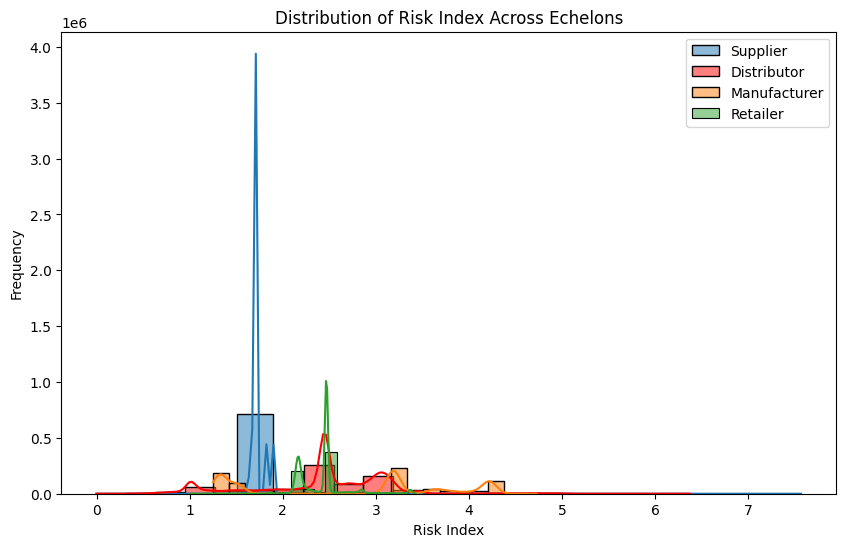

In [15]:
plt.figure(figsize=(10, 6))
# sns.set_palette("bright")
# Plot the distribution of each echelon
sns.histplot(data=df, x='RI_Supplier1', bins=20, kde=True, label='Supplier')
sns.histplot(data=df, x='RI_Distributor1', bins=20, kde=True, label='Distributor', color='red')
sns.histplot(data=df, x='RI_Manufacturer1', bins=20, kde=True, label='Manufacturer')
sns.histplot(data=df, x='RI_Retailer1', bins=20, kde=True, label='Retailer')

# Add labels and title
plt.xlabel('Risk Index')
plt.ylabel('Frequency')
plt.title('Distribution of Risk Index Across Echelons')

# Add legend
plt.legend()

# Show the plot
plt.show()

Interpretations:

- Most of the RI values of Supplier echelon b/w 1 and 2
- Spread of RI values of Distributor echelon look more wide as compared to others.
- More risk is associated with Distributor and Manufacturer echelon as they are spreaded more in rightward.

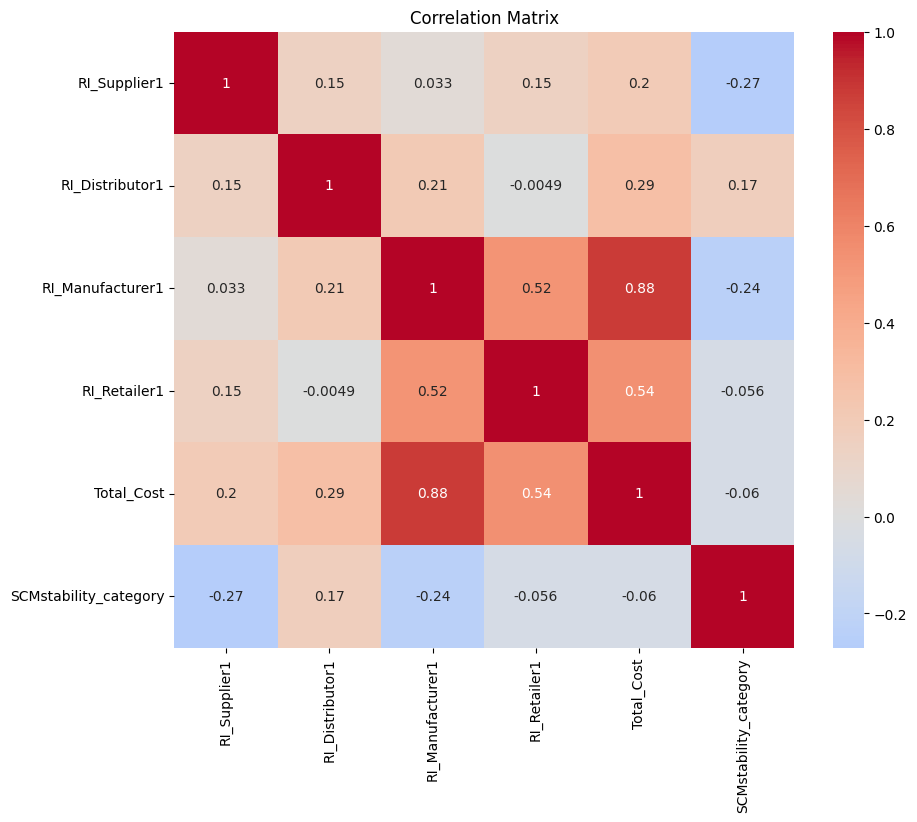

In [16]:
# Calculate correlation matrix for numerical columns
numeric_cols = df.select_dtypes(include='number')
correlation_matrix = numeric_cols.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

Interpretations:

- RI_Supplier has highest cross correlation with Total_Cost
- RI_Distributor has highest cross correlation with Total_Cost
- RI_Manufactures has highest cross correlation with Total_Cost
- RI_Retailer has highest cross correlation with Total_Cost
- Total_Cost has highest cross correlation with RI_Manufacturer
- SCMstability_category has highest cross correlation with RI_Distributor

Bar Chart

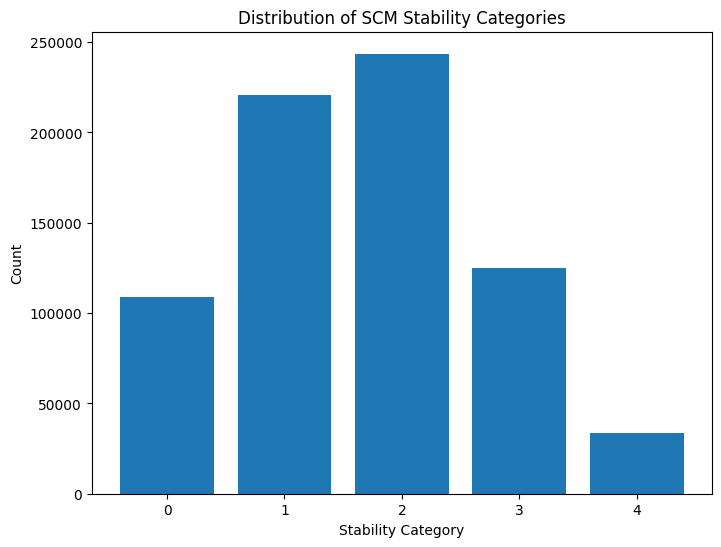

In [19]:
# Count and plot the stability categories
stability_counts = df['SCMstability_category'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(stability_counts.index, stability_counts.values)
plt.xlabel('Stability Category')
plt.ylabel('Count')
plt.title('Distribution of SCM Stability Categories')
plt.xticks(stability_counts.index)
plt.show()

Interpretations:

- Most of the time this Supply chain network is found in Stability category 2.
- Very rarely the Supply Chain Network is in the most stable category (4).

In [20]:
df.to_csv('./Saves/cleaned_data.csv', index=False)

---

# **Modelling**

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import pickle

In [22]:
import tensorflow as tf
from keras.layers import Input # for input layer
from keras.layers import Dense # for hidden layer + output layer
from keras.models import Sequential # SISO , no skipping of any layer for data flow
from keras import metrics
from keras.models import load_model

In [23]:
df = pd.read_csv('./Saves/cleaned_data.csv')

**Dataset Structure:**

The dataset consists of a time-series sequence with each entry representing a specific timestamp. Each timestamp contains information about various attributes related to the supply chain network. Based on the information you've provided earlier, the dataset structure can be summarized as follows:

**Timestamp:** The timestamp when the data point was recorded. 

**RI_Supplier1:** Risk Index value associated with the supplier echelon.

**RI_Distributor1:** Risk Index value associated with the distributor echelon.

**RI_Manufacturer1:** Risk Index value associated with the manufacturer echelon.

**RI_Retailer1:** Risk Index value associated with the retailer echelon.

**Total_Cost:** Total cost associated with the supply chain at that timestamp.

**SCMstability_category:** Categorical classification representing the stability category of the supply chain at that timestamp.

**Target Variable**: **SCMstability_category**

In [24]:
df.columns

Index(['Timestamp', 'RI_Supplier1', 'RI_Distributor1', 'RI_Manufacturer1',
       'RI_Retailer1', 'Total_Cost', 'SCMstability_category'],
      dtype='object')

In [25]:
len(df)

732331

Dropping not needed column

In [26]:
df = df.drop(columns=['Timestamp'])

In [27]:
df.columns

Index(['RI_Supplier1', 'RI_Distributor1', 'RI_Manufacturer1', 'RI_Retailer1',
       'Total_Cost', 'SCMstability_category'],
      dtype='object')

In [28]:
# Define input features (RI values of all echelons and Total Cost) and target variable
input_features = ['RI_Supplier1', 'RI_Distributor1', 'RI_Manufacturer1', 'RI_Retailer1', 'Total_Cost']
target_variable = 'SCMstability_category'

# Split data into features (X) and target (y)
X = df[input_features].values
y = df[target_variable].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Save the y_test numpy array to a binary file
np.save('./Saves/y_test_np.npy', y_test)

In [30]:
X_train.shape

(585864, 5)

In [31]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
encoder = OneHotEncoder()

y_train_reshaped = y_train.reshape(-1, 1)
y_train_onehot = encoder.fit_transform(y_train_reshaped).toarray()

y_test_reshaped = y_test.reshape(-1, 1)
y_test_onehot = encoder.fit_transform(y_test_reshaped).toarray()

In [33]:
num_classes = len(np.unique(y_train))
num_classes

5

End of pre-processing

---

<img src="./Images/neural_network_drawing.png">

In [34]:
def create_ffnn(): # densely connected network
  ffnn = Sequential() # made an object of Sequential class, data get processed sequentially
  ffnn.add(Input(shape=(5,))) # input layer added
  ffnn.add(Dense(units=64,activation="relu")) # 64 neurons hidden layer
  ffnn.add(Dense(units=32,activation="relu")) # another hidden layer
  ffnn.add(Dense(units=num_classes, activation="softmax")) # output layer # actiavtionfxn: is "softmax" becoz it is multi-class classification
  return ffnn

**Justification of model's choice**: 
- Input layer is used to feed input features values to the network
- Two hidden layers are kept in the architecture. Large number of hidden layers can lead to overfitting as model becomes very complex in that case.
- Number of neurons in hidden are like automatically engineered features by neural network. Mapping of 5 features to 64 features intially to detect pattern in the data better. In second hidden layer neurons are reduced to half to controll complexity of model which affects training time too.
- RELU: This works like a drop-out layer (randomly some neurons are dropped during backpropagation). Most common way to reduce overfitting is apply ReLU in all hidden layers.
- Last layer is output which gives prediction vector. Praobability of data point to belong in each class is given.
- Softmax activation action is used in case of multi-class classification.

In [35]:
ffnn = create_ffnn()

In [36]:
ffnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                384       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
Total params: 2629 (10.27 KB)
Trainable params: 2629 (10.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
# Compile the model
ffnn.compile(loss='categorical_crossentropy', optimizer='adam', 
             metrics=['accuracy' ,
                      tf.keras.metrics.Precision(),
                      tf.keras.metrics.Recall(),
                      tf.keras.metrics.F1Score()])


**Hyperparameters:**
- Learning rate of Adam optimiser: 0.001 (default)

In [38]:
history = ffnn.fit(X_train_scaled, y_train_onehot, 
        epochs=20, batch_size=25, validation_split=0.2)

Epoch 1/20
18748/18748 [==============================] - 11s 586us/step - loss: 0.0703 - accuracy: 0.9798 - precision: 0.9815 - recall: 0.9770 - f1_score: 0.9685 - val_loss: 0.0450 - val_accuracy: 0.9886 - val_precision: 0.9891 - val_recall: 0.9882 - val_f1_score: 0.9826
Epoch 2/20
18748/18748 [==============================] - 11s 583us/step - loss: 0.0406 - accuracy: 0.9889 - precision: 0.9892 - recall: 0.9885 - f1_score: 0.9836 - val_loss: 0.0465 - val_accuracy: 0.9879 - val_precision: 0.9882 - val_recall: 0.9876 - val_f1_score: 0.9814
Epoch 3/20
18748/18748 [==============================] - 11s 587us/step - loss: 0.0356 - accuracy: 0.9902 - precision: 0.9905 - recall: 0.9900 - f1_score: 0.9857 - val_loss: 0.0334 - val_accuracy: 0.9911 - val_precision: 0.9914 - val_recall: 0.9910 - val_f1_score: 0.9873
Epoch 4/20
18748/18748 [==============================] - 11s 587us/step - loss: 0.0332 - accuracy: 0.9907 - precision: 0.9909 - recall: 0.9905 - f1_score: 0.9863 - val_loss: 0.0309

In [39]:
ffnn.save('./Saves/ffnn_model.h5')

/Users/akshay./Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
# # Load the model
# ffnn = load_model('ffnn_model.h5')

In [41]:
# Save the history object to a file using pickle
with open('./Saves/history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

---

#### Model Evaluation

In [42]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [43]:
# y_test = np.load('y_test_np.npy')

In [44]:
# # Load the history dictionary from the pickle file
# with open('history.pkl', 'rb') as f:
#     history = pickle.load(f)

In [45]:
print(len(y_test))
y_test

146467


array([1, 3, 2, ..., 3, 2, 2])

In [46]:
# Convert predicted probabilities to class predictions
y_pred_prob = ffnn.predict(X_test_scaled)

4578/4578 [==============================] - 1s 259us/step


In [47]:
y_pred_prob

array([[1.0697617e-08, 1.0000000e+00, 9.5221053e-12, 1.9521135e-08,
        1.8938022e-14],
       [1.1465338e-05, 8.3476124e-09, 1.3174841e-11, 9.9994028e-01,
        4.8253707e-05],
       [9.0662530e-04, 1.4448840e-27, 9.9909329e-01, 4.7910208e-21,
        6.1809779e-08],
       ...,
       [4.6886387e-05, 2.7198962e-06, 9.7283043e-11, 9.9927336e-01,
        6.7710358e-04],
       [2.1304024e-04, 3.9529588e-34, 9.9978691e-01, 3.4196664e-21,
        5.9989382e-08],
       [2.8872726e-04, 2.9828822e-28, 9.9971122e-01, 5.5061718e-21,
        1.3529752e-08]], dtype=float32)

In [48]:
y_pred = np.argmax(y_pred_prob, axis=1)

In [49]:
print(len(y_pred))
y_pred

146467


array([1, 3, 2, ..., 3, 2, 2])

In [50]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1-score (can specify 'macro', 'weighted', 'micro', etc.)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9932
Precision: 0.9932
Recall: 0.9932
F1-score: 0.9932
Confusion Matrix:
[[21560    20   192    53    38]
 [    4 44161     0    84     0]
 [  304     0 48254     1    18]
 [   22    42     0 24804    10]
 [  109     1    22    73  6695]]


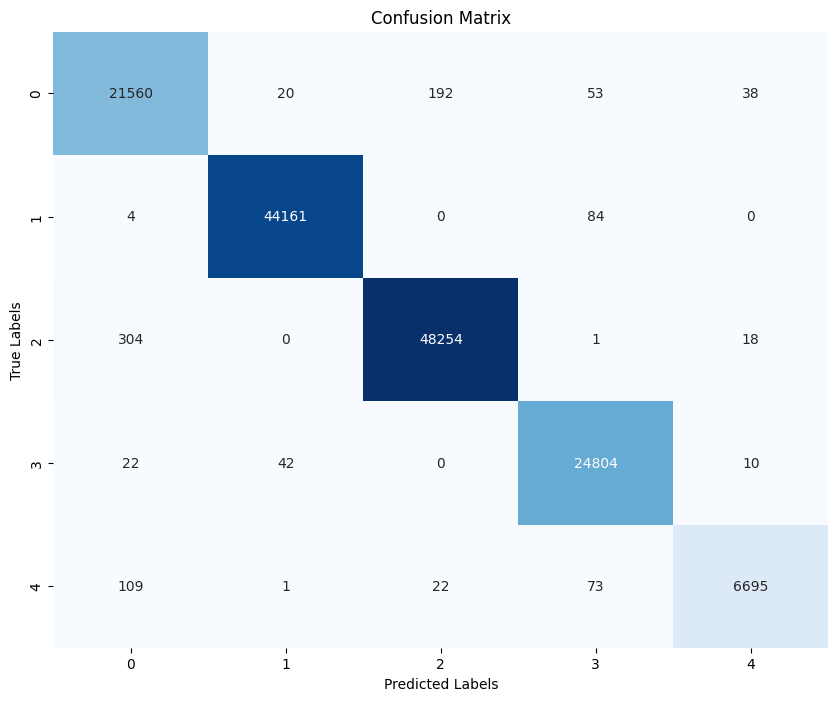

In [51]:
# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

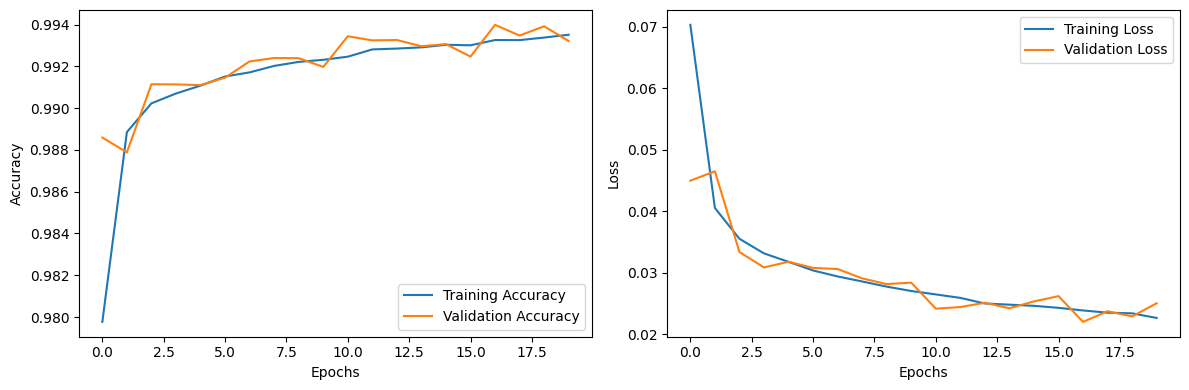

In [52]:
# Plot accuracy and loss over training epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**ROC Curve**

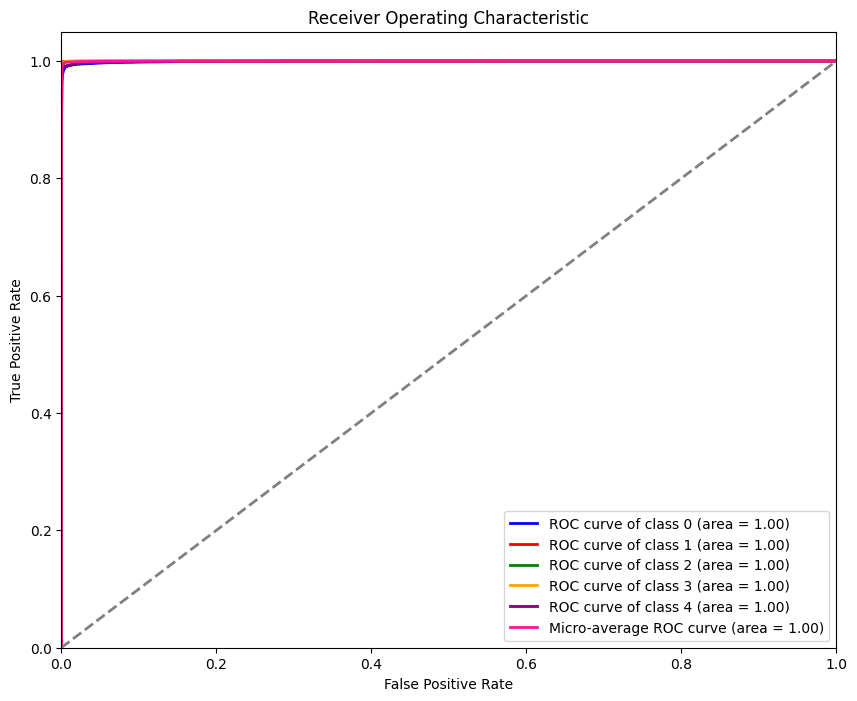

In [53]:
# Compute ROC curve and ROC area for each class
n_classes = num_classes
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_onehot.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(10, 8))
lw = 2

colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])  # Customize colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', lw=lw,
         label='Micro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc["micro"]))

plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()